## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data

In [2]:
df= pd.read_csv('WA_Fn-UseC_-IT-Help-Desk.csv')

## Data Profiling

In [3]:
df.head(5)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
0,1,1929,1 - Junior,50,Systems,Issue,2 - Normal,0 - Unassigned,3,1 - Unsatisfied
1,2,1587,2 - Regular,15,Software,Request,1 - Minor,1 - Low,5,1 - Unsatisfied
2,3,925,2 - Regular,15,Access/Login,Request,2 - Normal,0 - Unassigned,0,0 - Unknown
3,4,413,4 - Management,22,Systems,Request,2 - Normal,0 - Unassigned,20,0 - Unknown
4,5,318,1 - Junior,22,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied


###Basic Information about Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ticket              100000 non-null  int64 
 1   requestor           100000 non-null  int64 
 2   RequestorSeniority  100000 non-null  object
 3   ITOwner             100000 non-null  int64 
 4   FiledAgainst        100000 non-null  object
 5   TicketType          100000 non-null  object
 6   Severity            100000 non-null  object
 7   Priority            100000 non-null  object
 8   daysOpen            100000 non-null  int64 
 9   Satisfaction        100000 non-null  object
dtypes: int64(4), object(6)
memory usage: 7.6+ MB


###Descriptive Statistic

In [5]:
df.describe()

,ticket,requestor,ITOwner,daysOpen
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,999.030670,25.461000,6.842830
std,28867.657797,577.507916,14.447961,7.377876
min,1.000000,1.000000,1.000000,0.000000
25%,25000.750000,499.000000,13.000000,1.000000
50%,50000.500000,999.000000,26.000000,5.000000
75%,75000.250000,1499.000000,38.000000,10.000000
max,100000.000000,2000.000000,50.000000,54.000000


##Data Cleaning

In [ ]:
df['Satisfaction'].unique()

array(['1 - Unsatisfied', '0 - Unknown', '3 - Highly satisfied',
       '2 - Satisfied'], dtype=object)

### 1.Drop Unknown of Satisfaction Level

In [ ]:
df= df[df['Satisfaction'] != '0 - Unknown']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69789 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ticket              69789 non-null  int64 
 1   requestor           69789 non-null  int64 
 2   RequestorSeniority  69789 non-null  object
 3   ITOwner             69789 non-null  int64 
 4   FiledAgainst        69789 non-null  object
 5   TicketType          69789 non-null  object
 6   Severity            69789 non-null  object
 7   Priority            69789 non-null  object
 8   daysOpen            69789 non-null  int64 
 9   Satisfaction        69789 non-null  object
dtypes: int64(4), object(6)
memory usage: 5.9+ MB


In [ ]:
df.sample(10)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
44489,44490,821,1 - Junior,26,Access/Login,Issue,2 - Normal,2 - Medium,1,3 - Highly satisfied
23575,23576,1070,3 - Senior,6,Systems,Request,2 - Normal,3 - High,15,1 - Unsatisfied
24388,24389,1310,2 - Regular,47,Hardware,Issue,2 - Normal,1 - Low,5,3 - Highly satisfied
7631,7632,743,4 - Management,47,Access/Login,Request,2 - Normal,3 - High,0,3 - Highly satisfied
8530,8531,919,2 - Regular,34,Software,Request,3 - Major,0 - Unassigned,3,3 - Highly satisfied
59541,59542,1577,2 - Regular,22,Systems,Request,2 - Normal,0 - Unassigned,17,1 - Unsatisfied
27041,27042,1089,1 - Junior,10,Access/Login,Request,2 - Normal,0 - Unassigned,0,3 - Highly satisfied
86888,86889,1407,4 - Management,12,Systems,Request,2 - Normal,3 - High,9,3 - Highly satisfied
88721,88722,250,2 - Regular,41,Systems,Issue,2 - Normal,3 - High,5,2 - Satisfied
44150,44151,947,3 - Senior,48,Systems,Request,2 - Normal,3 - High,10,3 - Highly satisfied


### 2.Drop Unclassified of Severity Level

In [ ]:
df['Severity'].unique()

array(['2 - Normal', '1 - Minor', '4 - Critical', '3 - Major',
       '0 - Unclassified'], dtype=object)

In [ ]:
df=df[df['Severity']!='0 - Unclassified']

In [ ]:
df.sample(10)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
21471,21472,1972,2 - Regular,46,Systems,Request,2 - Normal,3 - High,20,3 - Highly satisfied
12462,12463,731,4 - Management,2,Hardware,Request,2 - Normal,0 - Unassigned,13,3 - Highly satisfied
61963,61964,104,4 - Management,25,Systems,Request,2 - Normal,3 - High,16,2 - Satisfied
2027,2028,331,2 - Regular,16,Systems,Request,2 - Normal,1 - Low,19,2 - Satisfied
85275,85276,1793,1 - Junior,30,Access/Login,Request,2 - Normal,0 - Unassigned,1,3 - Highly satisfied
1732,1733,73,4 - Management,31,Systems,Request,2 - Normal,0 - Unassigned,5,3 - Highly satisfied
18439,18440,898,1 - Junior,18,Hardware,Request,2 - Normal,2 - Medium,23,3 - Highly satisfied
57236,57237,944,1 - Junior,22,Systems,Issue,2 - Normal,1 - Low,4,2 - Satisfied
64208,64209,213,1 - Junior,26,Access/Login,Issue,1 - Minor,2 - Medium,0,2 - Satisfied
87260,87261,903,3 - Senior,9,Systems,Request,2 - Normal,3 - High,6,3 - Highly satisfied


###3. Drop Duplicates

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69526 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ticket              69526 non-null  int64 
 1   requestor           69526 non-null  int64 
 2   RequestorSeniority  69526 non-null  object
 3   ITOwner             69526 non-null  int64 
 4   FiledAgainst        69526 non-null  object
 5   TicketType          69526 non-null  object
 6   Severity            69526 non-null  object
 7   Priority            69526 non-null  object
 8   daysOpen            69526 non-null  int64 
 9   Satisfaction        69526 non-null  object
dtypes: int64(4), object(6)
memory usage: 5.8+ MB


### 4.Check Unassigned Level of Priority Column

In [ ]:
df['Priority'].unique()

array(['0 - Unassigned', '1 - Low', '2 - Medium', '3 - High'],
      dtype=object)

In [ ]:
unassigned_count=df[df['Priority']=='0 - Unassigned'].shape[0]
unassigned_count

20902

In [ ]:
Persentage_unassigned=unassigned_count/df.shape[0]*100
Persentage_unassigned

30.06357333947013

***Due to Unassigned Level in 'Priority' column get 30% as a high rate in data, it will be included in calculation and will be seperated to analyze after that.

##Correlation Calculation

###  Create Numeric Columns

In [ ]:
def convert_satisfaction(value):
    return { "1 - Unsatisfied": 1, "2 - Satisfied": 2, "3 - Highly satisfied": 3}.get(value, None)

def convert_priority(value):
    return {"0 - Unassigned": 0, "1 - Low": 1, "2 - Medium": 2, "3 - High": 3, "4 - Critical": 4}.get(value, None)

def convert_severity(value):
    return {"1 - Minor": 1, "2 - Normal": 2, "3 - High": 3, "4 - Critical": 4}.get(value, None)
def convert_RequestorSeniority(value):
    return {"1 - Junior": 1, "2 - Regular": 2, "3 - Senior": 3, "4 - Management": 4}.get(value, None)

df["Satisfaction_Num"] = df["Satisfaction"].apply(convert_satisfaction)
df["Priority_Num"] = df["Priority"].apply(convert_priority)
df["Severity_Num"] = df["Severity"].apply(convert_severity)
df["RequestorSeniority_Num"] = df["RequestorSeniority"].apply(convert_RequestorSeniority)









In [ ]:
df.sample(10)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction,Satisfaction_Num,Priority_Num,Severity_Num,RequestorSeniority_Num
33304,33305,710,3 - Senior,22,Software,Request,2 - Normal,0 - Unassigned,5,2 - Satisfied,2,0,2.0,3
28439,28440,318,1 - Junior,9,Systems,Request,2 - Normal,0 - Unassigned,19,1 - Unsatisfied,1,0,2.0,1
97283,97284,952,2 - Regular,2,Access/Login,Request,2 - Normal,0 - Unassigned,0,3 - Highly satisfied,3,0,2.0,2
10420,10421,1684,2 - Regular,44,Access/Login,Request,2 - Normal,2 - Medium,0,1 - Unsatisfied,1,2,2.0,2
91171,91172,306,2 - Regular,4,Systems,Issue,2 - Normal,3 - High,9,3 - Highly satisfied,3,3,2.0,2
79830,79831,1381,4 - Management,5,Access/Login,Request,2 - Normal,3 - High,0,3 - Highly satisfied,3,3,2.0,4
35729,35730,736,3 - Senior,20,Access/Login,Request,2 - Normal,3 - High,0,2 - Satisfied,2,3,2.0,3
34802,34803,761,1 - Junior,26,Access/Login,Request,2 - Normal,2 - Medium,0,1 - Unsatisfied,1,2,2.0,1
44245,44246,1221,3 - Senior,6,Access/Login,Issue,2 - Normal,2 - Medium,2,1 - Unsatisfied,1,2,2.0,3
35808,35809,1753,1 - Junior,40,Systems,Request,2 - Normal,1 - Low,13,1 - Unsatisfied,1,1,2.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69526 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ticket                  69526 non-null  int64  
 1   requestor               69526 non-null  int64  
 2   RequestorSeniority      69526 non-null  object 
 3   ITOwner                 69526 non-null  int64  
 4   FiledAgainst            69526 non-null  object 
 5   TicketType              69526 non-null  object 
 6   Severity                69526 non-null  object 
 7   Priority                69526 non-null  object 
 8   daysOpen                69526 non-null  int64  
 9   Satisfaction            69526 non-null  object 
 10  Satisfaction_Num        69526 non-null  int64  
 11  Priority_Num            69526 non-null  int64  
 12  Severity_Num            66081 non-null  float64
 13  RequestorSeniority_Num  69526 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory u

## Exploratory Data Analysis

In [ ]:
cols_for_correlation = ['Priority_Num','Satisfaction_Num','Severity_Num','RequestorSeniority_Num','daysOpen']
corr_matrix=df[cols_for_correlation].corr()
corr_matrix

,Priority_Num,Satisfaction_Num,Severity_Num,RequestorSeniority_Num,daysOpen
Priority_Num,1.000000,0.004229,0.018738,0.242720,-0.061295
Satisfaction_Num,0.004229,1.000000,0.041836,0.024343,-0.139047
Severity_Num,0.018738,0.041836,1.000000,-0.005810,0.015789
RequestorSeniority_Num,0.242720,0.024343,-0.005810,1.000000,-0.089812
daysOpen,-0.061295,-0.139047,0.015789,-0.089812,1.000000


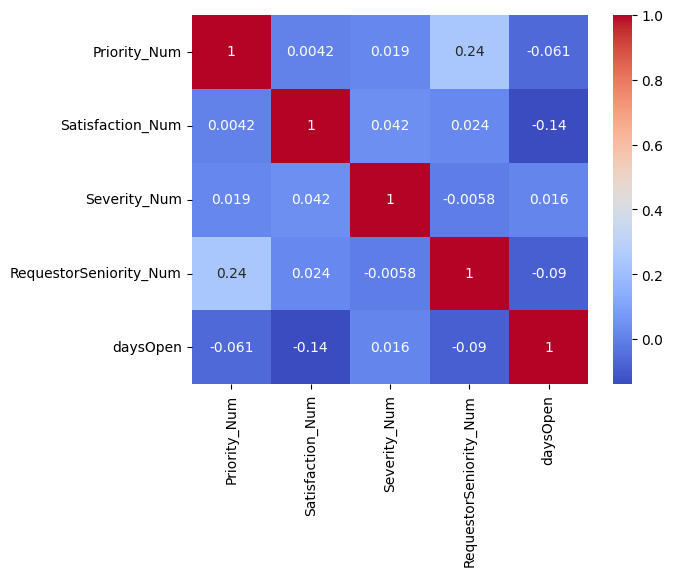

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

##Conclustion

###Comments on efficiency and correlation
1. Priority_Num and processing time (daysOpen)

- Correlation coefficient -0.061, meaning that tickets with higher priority are usually processed faster.

- However, the correlation is weak → It cannot be confirmed that priority has a strong influence on processing time.

2. Severity_Num and processing time (daysOpen)

The coefficient of 0.016 is very small → Severity does not significantly influence processing time.

3. Priority_Num and satisfaction level (Satisfaction_Num)

The coefficient of 0.042 is very low → There is no clear relationship between priority level and customer satisfaction.

4. Processing time (daysOpen) and satisfaction (Satisfaction_Num)
Coefficient -0.14 → Longer processing time may reduce satisfaction, but the effect is still small.

5. RequestorSeniority and Priority (Priority_Num)
Coefficient of 0.24 → Senior (RequestorSenority) oftens handles high priority cases

6. RequestorSeniority and processing time (daysOpen)
Senior (RequestorSenority) reduces processing time

## In case drop Unassigned Level of Priorty Comlumn. What will it happen?

In [ ]:
df1 = df[df['Priority']!='0 - Unassigned']

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48624 entries, 1 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ticket                  48624 non-null  int64  
 1   requestor               48624 non-null  int64  
 2   RequestorSeniority      48624 non-null  object 
 3   ITOwner                 48624 non-null  int64  
 4   FiledAgainst            48624 non-null  object 
 5   TicketType              48624 non-null  object 
 6   Severity                48624 non-null  object 
 7   Priority                48624 non-null  object 
 8   daysOpen                48624 non-null  int64  
 9   Satisfaction            48624 non-null  object 
 10  Satisfaction_Num        48624 non-null  int64  
 11  Priority_Num            48624 non-null  int64  
 12  Severity_Num            46194 non-null  float64
 13  RequestorSeniority_Num  48624 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory u

In [ ]:
def convert_satisfaction(value):
    return { "1 - Unsatisfied": 1, "2 - Satisfied": 2, "3 - Highly satisfied": 3}.get(value, None)

def convert_priority(value):
    return {"1 - Low": 1, "2 - Medium": 2, "3 - High": 3, "4 - Critical": 4}.get(value, None)

def convert_severity(value):
    return {"1 - Minor": 1, "2 - Normal": 2, "3 - High": 3, "4 - Critical": 4}.get(value, None)
def convert_RequestorSeniority(value):
    return {"1 - Junior": 1, "2 - Regular": 2, "3 - Senior": 3, "4 - Management": 4}.get(value, None)

df1["Satisfaction_Num"] = df["Satisfaction"].apply(convert_satisfaction)
df1["Priority_Num"] = df["Priority"].apply(convert_priority)
df1["Severity_Num"] = df["Severity"].apply(convert_severity)
df1["RequestorSeniority_Num"] = df["RequestorSeniority"].apply(convert_RequestorSeniority)

<ipython-input-71-707886d832fb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Satisfaction_Num"] = df["Satisfaction"].apply(convert_satisfaction)
<ipython-input-71-707886d832fb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Priority_Num"] = df["Priority"].apply(convert_priority)
<ipython-input-71-707886d832fb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume